In [114]:
import os
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl

import pylab as pl

import utils as util
import plotting as putil
import importlib

In [115]:
putil.set_sns_style(style='dark', min_fontsize=12)

In [676]:
srcdir = '/Users/julianarhee/Documents/rutalab/projects/courtship/2d-projector'
fname = '20220826_df_FH'
# fname = '20220918_df_excluded_FH'
fpath = os.path.join(srcdir, '{}.pkl'.format(fname))
df0=pd.read_pickle(fpath)
df0.shape

(1008000, 112)

In [677]:
figdir = os.path.join(srcdir, fname)
if not os.path.exists(figdir):
    os.makedirs(figdir)
print(figdir)

/Users/julianarhee/Documents/rutalab/projects/courtship/2d-projector/20220918_df_excluded_FH


In [680]:
df0['gtype'].unique()

array(['887', '850', '911', 'splitP1', '821'], dtype=object)

In [681]:
df0['exp_abbr'] = [s.split('_')[3] for s in df0['exp']]

In [682]:
df0['exp_abbr'].unique()

array(['6d'], dtype=object)

In [683]:
df = df0[df0['gtype']=='splitP1']

In [7]:
# fig, axn = pl.subplots(len(df['exp_id'].unique()), 1)

# for i, (id_, d_) in enumerate(df.groupby('exp_id')):
#     ax=axn[i]
#     for e in epoch_starts:
#         ax.axvline(x=e, c='r')
#     ax.plot(d_['time'], d_['vel']) #sns.lineplot(data=df_, x='time', y='vel', hue='exp_id', ax=ax)

# split by epoch

exp design: 1min baseline (0-20-20), 1min 50-20-20, 1 min 100-20-20, 1 min 200-20-20, 1 min white (255-255-255). followed by 10 min baseline; rgb1-4 is measured as percentage of animals tracking

In [136]:
epoch_names = ['pre', 'r50', 'r100', 'r200', 'w255', 'post']
exp_design = [-1, 50, 100, 200, 255, 0]
epoch_starts = [0, 60, 120, 180, 240, 300]

df0['epoch']=''
for i, ep in enumerate(epoch_starts):
    if ep<epoch_starts[-1]:
        df0.loc[ (df0['time']>=ep) & (df0['time']<epoch_starts[i+1]), 'epoch'] = epoch_names[i]
    else:
        df0.loc[(df0['time']>=ep), 'epoch'] = epoch_names[i]

In [137]:
df0['wing_ang_maxmindiff'] = df0['max_wing_ang'] - df0['min_wing_ang']
df0['wing_ang_lrdiff'] = (df0['wing_r_ang'] - df0['wing_l_ang']) % 2*np.pi

In [138]:
df0['wing_ang_lrdiff'].min(), df0['wing_ang_lrdiff'].max()

(0.00010868757838020703, 6.283171872590661)

In [139]:
df0['wing_r_ang'].min(), df0['wing_r_ang'].max()

(-1.3380235820056279, 3.0776486564817898)

In [593]:
means = df0.groupby(['exp','exp_abbr',  'exp_id', 'epoch', 'flynum'])\
                [['vel', 'interdot_dist', 'ang_vel', 'max_wing_ang',
                 'wing_ang_maxmindiff', 'wing_ang_lrdiff']].mean().reset_index()
# means

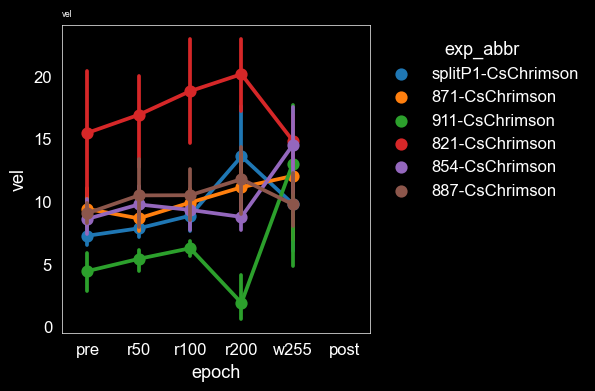

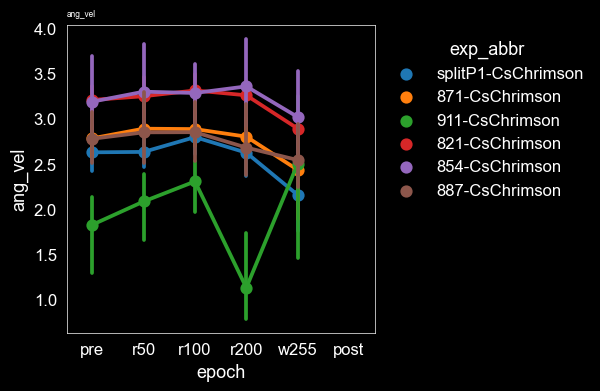

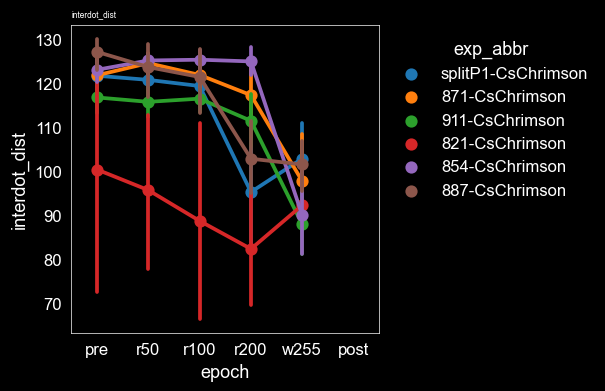

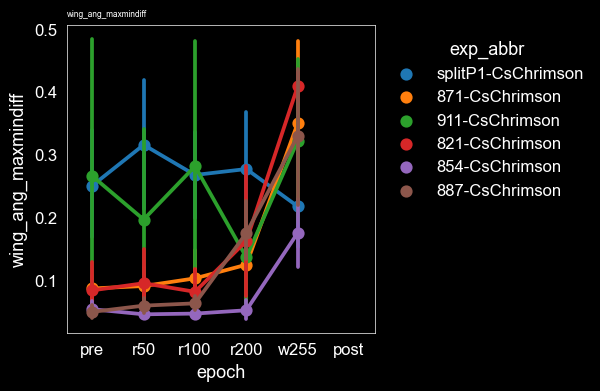

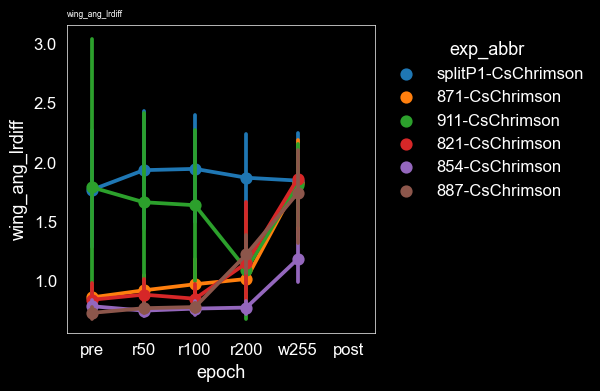

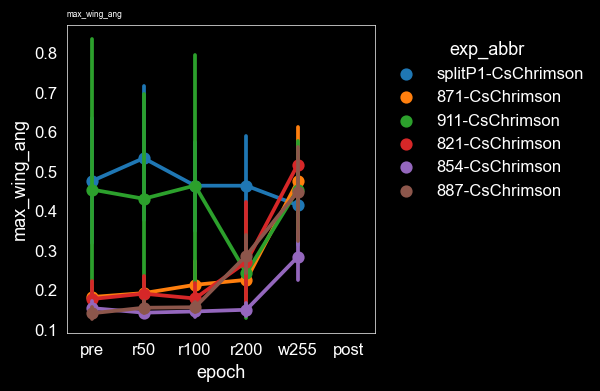

In [367]:
plot_yvars = ['vel', 'ang_vel', 'interdot_dist', 'wing_ang_maxmindiff',
             'wing_ang_lrdiff', 'max_wing_ang']
yv = 'wing_ang_maxmindiff'
plotdf = means[means['epoch']!='post']
for yv in plot_yvars:
    fig, ax = pl.subplots()
    sns.pointplot(data=plotdf, x='epoch', y=yv, order=epoch_names, ax=ax,
                  hue='exp_abbr')
    sns.move_legend(ax, loc='upper left', bbox_to_anchor=(1,1), frameon=False)
    ax.set_box_aspect(1)
    ax.set_title(yv, loc='left', fontsize=6)
    figname = 'epoch-v-{}_by_exp'.format(yv)
    pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [492]:
import scipy.stats as spstats

In [601]:
# yvar = 'wing_ang_maxmindiff'
yvar = 'interdot_dist' #'interdot_dist'
# df1 = df0.copy().reset_index().drop_duplicates()
df0['exp_ix'] = ['{}_{}'.format(i, v) for i, v in 
                 zip(df0['exp_abbr'].values, df0['flynum'].values)]
df0['frame_ix'] = df0.groupby(['exp_ix', 'epoch']).cumcount()
df1 = df0.copy().reset_index(drop=True)

means_pivot = means.pivot_table(index=['exp_abbr', 'flynum'], 
                        columns='epoch', 
                        values=yvar).reset_index()
means_pivot.columns.name = None
# means_pivot = df1[['exp_abbr', 'flynum', 'epoch', 'exp_id', yvar]].dropna().pivot(
#                     index = ['exp_abbr', 'flynum', 'exp_id'], 
#                     values = yvar, columns=['epoch']).reset_index()

In [602]:
means_pivot

,exp_abbr,flynum,post,pre,r100,r200,r50,w255
0,821-CsChrimson,0,100.027684,104.457310,61.790196,70.995918,89.561639,89.876368
1,821-CsChrimson,1,98.277139,112.117220,101.181510,95.669249,94.587681,92.841019
2,821-CsChrimson,2,109.801116,125.482178,120.554508,94.463999,126.232605,93.074262
3,821-CsChrimson,3,91.080962,59.301124,71.177893,68.104720,72.264875,93.207171
4,854-CsChrimson,0,124.932063,122.535550,125.512938,129.575572,126.467019,90.576821
5,854-CsChrimson,1,126.131328,127.913059,125.256131,124.934660,128.286865,93.300652
6,854-CsChrimson,2,123.928968,122.910914,125.404959,125.993378,125.222974,74.095756
7,854-CsChrimson,3,130.234284,126.636717,130.315015,131.602512,126.596685,117.148209
8,854-CsChrimson,4,125.010516,124.911173,129.418154,127.441759,124.682992,95.017728
9,854-CsChrimson,5,122.311324,119.597204,118.366203,117.978250,122.347315,73.539981


In [603]:
cols = [c for c in epoch_names if c!= 'post']
d_list=[]
for exp, d_ in means_pivot.groupby('exp_abbr'):
    led_cv = spstats.variation(d_[cols], axis=0)
    id_cv =  spstats.variation(d_[cols], axis=1)
    for i in [0, 1]:
        m_ = pd.DataFrame(data=spstats.variation(d_[cols].dropna(), axis=i), columns=[yvar])
        m_['exp_ix'] = exp
        m_['cv'] = 'cv_led' if i==0 else 'cv_id'
        m_['level'] = range(len(m_))
        # if CV is for each LED level, range is 0 to 5
        # else CV is for each fly (across LED levels), so range is 0 to N flies
        d_list.append(m_)
cv = pd.concat(d_list, axis=0)

In [604]:
d_

,exp_abbr,flynum,post,pre,r100,r200,r50,w255
28,splitP1-CsChrimson,0,120.438139,124.615043,121.918625,127.283327,120.671836,131.047080
29,splitP1-CsChrimson,1,115.025035,125.968284,120.669980,67.040091,124.589545,99.978926
30,splitP1-CsChrimson,2,102.477713,122.236379,118.814597,112.996891,121.669038,93.552495
31,splitP1-CsChrimson,3,118.521421,126.130063,122.218865,92.314965,118.581582,97.613504
32,splitP1-CsChrimson,4,109.473700,121.810886,123.209434,81.633940,121.618382,91.613839
33,splitP1-CsChrimson,5,104.458729,119.349435,120.598953,103.301352,120.004133,109.800190
34,splitP1-CsChrimson,6,113.585831,121.730114,118.080769,96.990809,121.775470,101.657844
35,splitP1-CsChrimson,7,103.232178,111.223893,108.859549,80.250884,116.604235,97.368393


In [605]:
x = d_[cols] #.dropna()
x

,pre,r50,r100,r200,w255
28,124.615043,120.671836,121.918625,127.283327,131.047080
29,125.968284,124.589545,120.669980,67.040091,99.978926
30,122.236379,121.669038,118.814597,112.996891,93.552495
31,126.130063,118.581582,122.218865,92.314965,97.613504
32,121.810886,121.618382,123.209434,81.633940,91.613839
33,119.349435,120.004133,120.598953,103.301352,109.800190
34,121.730114,121.775470,118.080769,96.990809,101.657844
35,111.223893,116.604235,108.859549,80.250884,97.368393


In [606]:
x['r50'].std()/x['r50'].mean()

0.01976078955249101

In [607]:
x['r100'].std()/x['r100'].mean()

0.03814456456869662

In [608]:
d_['r200'].std()/d_['r200'].mean()

0.203306744703354

In [609]:
cv[cv['cv']=='cv_led'] #.groupby(['exp_ix', 'level']).max()

,interdot_dist,exp_ix,cv,level
0,0.247754,821-CsChrimson,cv_led,0
1,0.203800,821-CsChrimson,cv_led,1
2,0.264569,821-CsChrimson,cv_led,2
3,0.155587,821-CsChrimson,cv_led,3
4,0.014921,821-CsChrimson,cv_led,4
0,0.029110,854-CsChrimson,cv_led,0
1,0.017441,854-CsChrimson,cv_led,1
2,0.027374,854-CsChrimson,cv_led,2
3,0.035596,854-CsChrimson,cv_led,3
4,0.160677,854-CsChrimson,cv_led,4


<Axes: xlabel='level', ylabel='interdot_dist'>

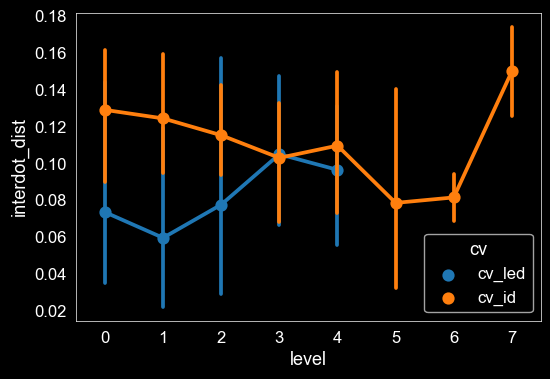

In [610]:
fig, ax = pl.subplots()
sns.pointplot(data=cv, x='level', y=yvar, ax=ax, hue='cv')

In [491]:
spstats.variation(d_[cols], axis=0)

array([0.16447825, 0.13494286, 0.20430964, 0.41723875, 0.56304818])

In [421]:
spstats.variation(d_[cols], axis=1)

array([0.02992884, 0.20771927, 0.09368268, 0.12310638, 0.16417173,
       0.06025383, 0.09440388, 0.12572259])

# trajectories?

In [142]:
def center_trajectories(df):
    # Step 2: Group the data by "exp_id"
    grouped = df.groupby('exp_id')
    # Step 3: Calculate the mean center for each trajectory
    centered_trajectories = []
    for exp_id, group in grouped:
        mean_pos_x = group['pos_x'].mean()
        mean_pos_y = group['pos_y'].mean()
        # Step 4: Subtract the mean values to center the coordinates
        centered_pos_x = group['pos_x'] - mean_pos_x#_global
        centered_pos_y = group['pos_y'] - mean_pos_y#_global
        # Step 5: Update the dataframe with centered coordinates
        group['centered_pos_x'] = centered_pos_x
        group['centered_pos_y'] = centered_pos_y
        centered_trajectories.append(group)
    # Combine the centered trajectories back into one dataframe
    centered_df = pd.concat(centered_trajectories)
    return centered_df

In [143]:
df0['exp_abbr'].unique()

array(['splitP1-CsChrimson', '871-CsChrimson', '911-CsChrimson',
       '821-CsChrimson', '854-CsChrimson', '887-CsChrimson'], dtype=object)

In [144]:
# df0['epoch_exp_id'] = ['_'.join([a, b]) for a, b in zip(df0['epoch'], df0['exp_id'])]
df0['flynum'] = [s.split('_')[-1] for s in df0['exp_id']]

In [145]:
# ordered_labels = ['{}_{}'.format(ep_, id_) \
#                   for ep_ in epoch_names for id_ in df0['exp_id'].unique()]


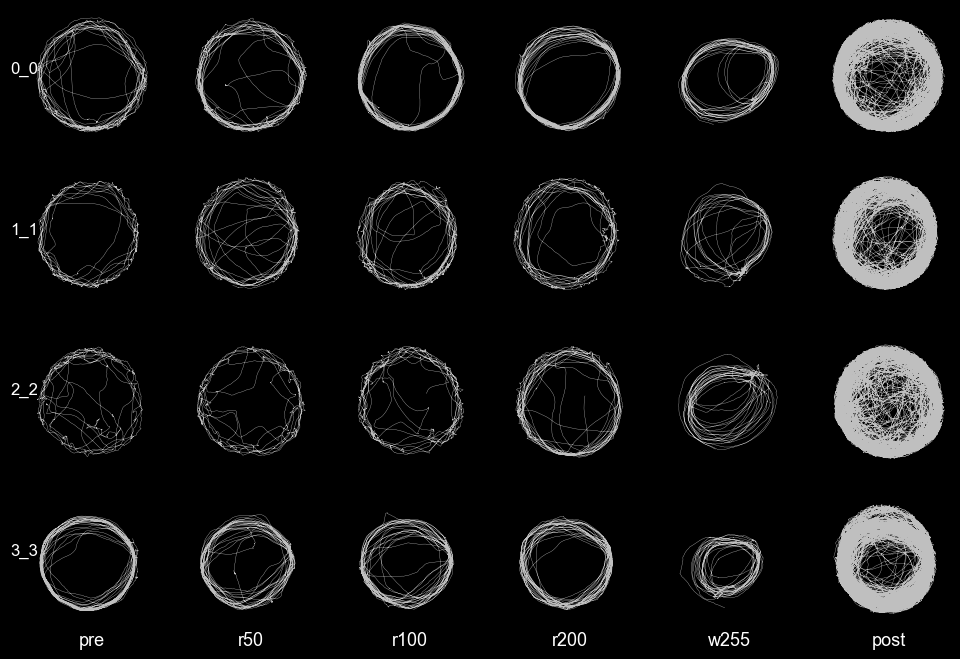

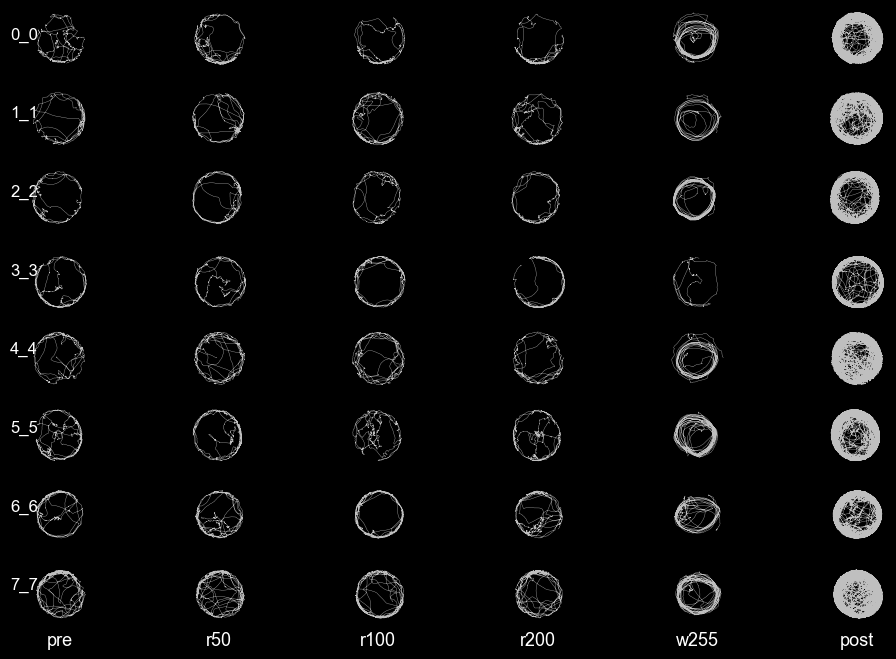

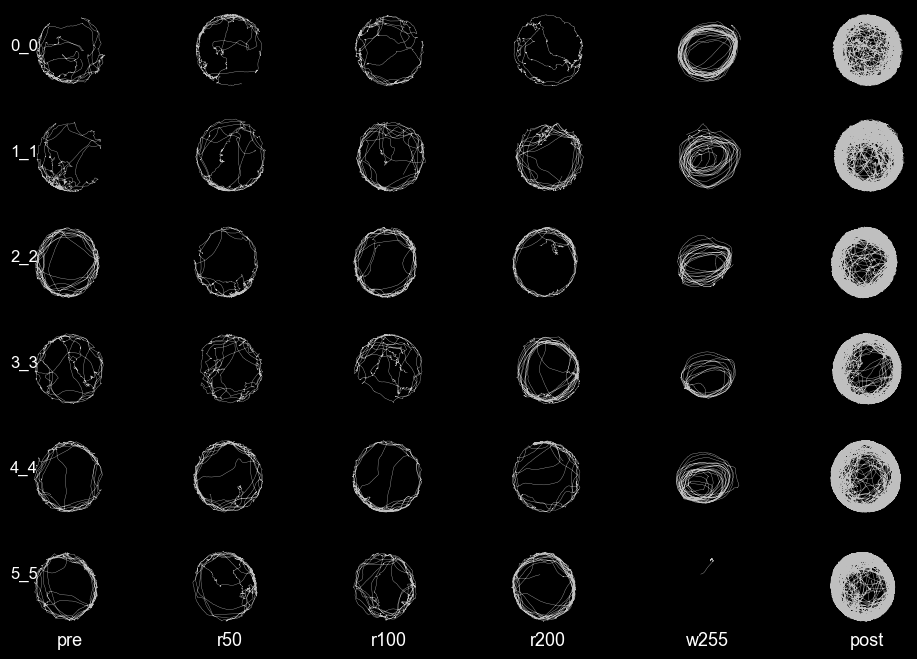

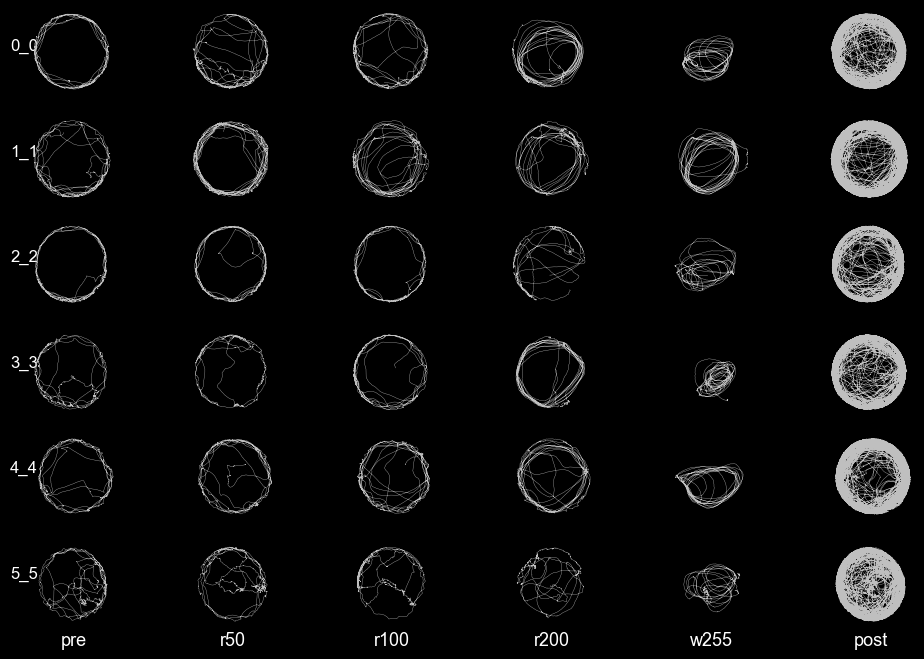

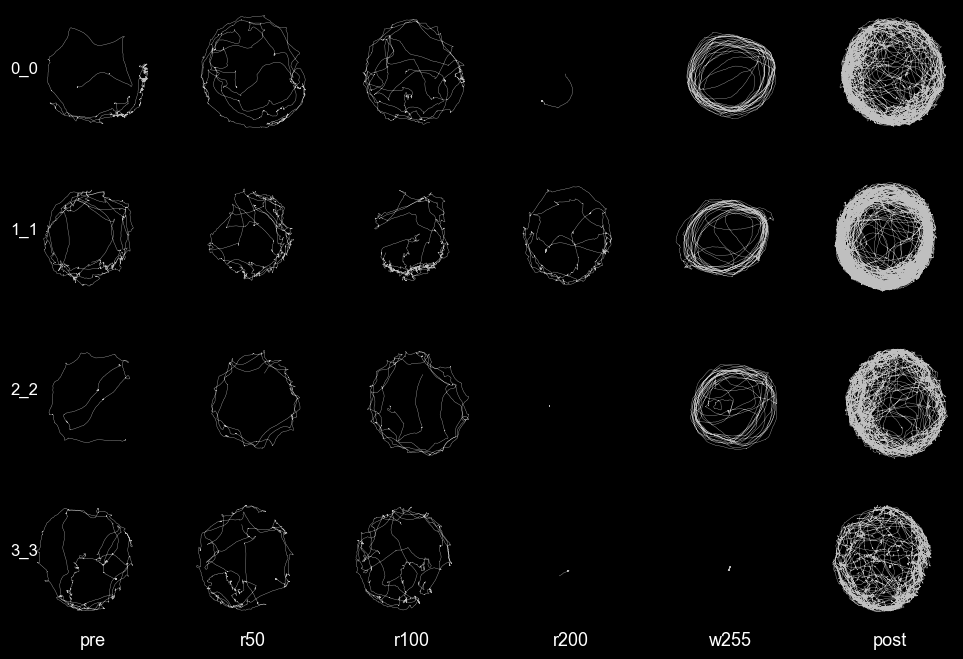

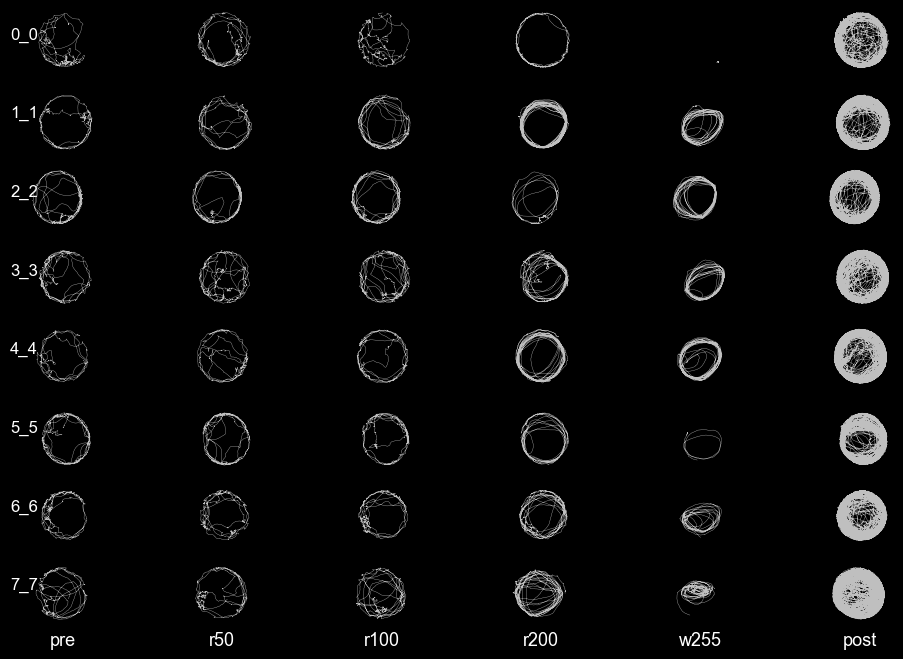

In [361]:
 #887, 871, 821
# curr_exp = '20220822_splitP1tit_1_splitP1-CsChrimson_5-7d_5minsteps_10minbaseline_60fps_trigger'

curr_exp = '821-CsChrimson'
df = df0[df0['exp_abbr']==curr_exp].copy()

for curr_exp, df in df0.groupby('exp_abbr'):
    dfc = center_trajectories(df)

    dfc['epoch_exp_id'] = ['_'.join([a, b]) for a, b in zip(dfc['epoch'], dfc['flynum'])]
    ordered_labels = ['{}_{}'.format(ep_, id_) \
                      for ep_ in epoch_names for id_ in dfc['flynum'].unique()]
    id_lut = dict((v, k) for k, v in enumerate(ordered_labels)) #df0['epoch_exp_id'].unique()))
    dfc['exp_ix'] = [id_lut[i] for i in dfc['epoch_exp_id']]
    dfc['frame_ix'] = dfc.groupby(['exp_ix']).cumcount()

    #plotdf = df[df['epoch']=='r200'].copy()
    fig, axn = pl.subplots(int(dfc['exp_id'].nunique()), int(dfc['epoch'].nunique()),
                           figsize=(12,8), sharex=True, sharey=True)

    for i, (id_, d_) in enumerate(dfc.groupby('flynum')):
        for j, ep in enumerate(epoch_names):
            e_ = d_[d_['epoch']==ep]
            ax=axn[i, j]
            ax.plot(e_['centered_pos_x'], e_['centered_pos_y'], lw=0.25, c=[0.75]*3)
            ax.set_aspect(1)
            if i==dfc['flynum'].nunique()-1:
                ax.set_xlabel(ep)
            # title
            pts = id_.split('_')[0:5]
            pts.append(id_.split('_')[-1])
            pid = '_'.join(pts)
            if j==0:
                ax.set_ylabel(pid, rotation=0, fontsize=12)
            #ax.axis('off')
            ax.spines[['left', 'bottom', 'right', 'top']].set_visible(False)
            ax.set_xticks([])
            ax.set_yticks([])
    figname = 'trajectories_{}'.format(curr_exp)
    pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [310]:
m[[c for c in epoch_names if c!='post']]

,pre,r50,r100,r200,w255
0,357416.339960,319564.401582,295766.691407,248061.126575,170315.109140
1,407734.094904,406549.747715,425084.028472,413254.288932,216261.301912
2,389008.719526,400612.967381,394660.856717,387684.222980,236887.318959
3,434402.123848,422111.705704,406634.124023,376105.968147,256478.133915
4,335464.797452,350004.293672,317161.905460,193091.841545,168813.981691
5,375844.023414,366271.444023,382335.697043,321597.213355,257452.316275


In [188]:
# plotdf = df_[df_['epoch']=='w255'].copy()
# plotdf.to_pickle(out_fpath)

In [672]:
# from scipy.spatial.distance import pdist
# Calculate the number of unique trajectories
def calculate_distmat_from_traj(df, trajvar='exp_ix', framevar='frame_ix',
                               xvar='centered_pos_x', yvar='centered_pos_y'):
    num_trajectories = df[trajvar].nunique()
    # Get unique frames
    unique_frames = df[framevar].unique()

    # Initialize an empty distance matrix
    distance_matrix = np.zeros((num_trajectories, num_trajectories))

    # Loop through each unique frame
    for frame in unique_frames:
        frame_data = df[df[framevar] == frame]

        # Extract positions as a 2D array
        positions = frame_data[[xvar, yvar]].values

        # Calculate pairwise Euclidean distances using broadcasting
        pairwise_distances = np.linalg.norm(positions[:, np.newaxis] - positions, axis=2)
        pairwise_distances[np.isnan(pairwise_distances)] = 0
        
        # Update the distance matrix (symmetrically)
        distance_matrix += pairwise_distances

    return distance_matrix

def fft_xcorr2D(x):
    '''input is a 4D array: (N, 2, #Rows, #Cols)
    E.g. (500, 2, 30, 30): 500 images, 2 bands (polarizations, for example), of 30x30 pixels
    '''
    # Over axes (-2,-1) (default in the fft2 function)
    ## Pad because of cyclic (circular?) behavior of the FFT
    x = np.fft2(np.pad(x,([0,0],[0,0],[0,34],[0,34]),mode='constant'))

    # Conjugate for correlation, not convolution (Conv. Theorem)
    x[:,1,:,:] = np.conj(x[:,1,:,:])

    # Over axes (-2,-1) (default in the ifft2 function)
    ## Multiply elementwise over 2:nd axis (2 image bands for me)
    ### fftshift over rows and column over images
    corr = np.fft.fftshift(np.ifft2(np.prod(x,axis=1)),axes=(-2,-1))

    # Return after removing padding
    return np.abs(corr)[:,3:-2,3:-2]

# def calculate_corrmat_from_traj(df, trajvar='exp_ix', framevar='frame_ix',
#                                xvar='centered_pos_x', yvar='centered_pos_y'):
    
#     num_trajectories = df[trajvar].nunique()

#     # Initialize an empty correlation matrix
#     correlation_matrix = np.zeros((num_trajectories, num_trajectories))

#     # Loop through each pair of trajectories
#     for i in range(num_trajectories):
#         for j in range(i, num_trajectories):
#             # Filter data for trajectory i and j
#             traj_i = df[df[trajvar] == i]
#             traj_j = df[df[trajvar] == j]
#             traj_i[xvar][np.isnan(traj_i[xvar])] = 0
#             traj_i[yvar][np.isnan(traj_i[yvar])] = 0
#             traj_j[xvar][np.isnan(traj_j[xvar])] = 0
#             traj_j[yvar][np.isnan(traj_j[yvar])] = 0
#             # Calculate the correlation coefficient between traj_i and traj_j for both x and y coordinates
#             correlation_x = np.corrcoef(traj_i[xvar].values, traj_j[xvar].values)[0, 1] #traj_i[xvar].corr(traj_j[xvar])
#             correlation_y = np.corrcoef(traj_i[xvar].values, traj_j[xvar].values)[0, 1] #traj_i[yvar].corr(traj_j[yvar])

#             # Average the correlations for x and y coordinates to get the overall correlation
#             overall_correlation = (correlation_x + correlation_y) / 2

#             # Store the correlation in the correlation matrix (symmetrically)
#             correlation_matrix[i, j] = overall_correlation
#             correlation_matrix[j, i] = overall_correlation

#     return correlation_matrix

In [646]:
curr_exp = '821-CsChrimson'
df = df0[df0['exp_abbr']==curr_exp].copy()
dfc = center_trajectories(df)

In [647]:
dfc['epoch_exp_id'] = ['_'.join([a, b]) for a, b in zip(dfc['epoch'], dfc['flynum'])]
ordered_labels = ['{}_{}'.format(ep_, id_) \
                  for ep_ in epoch_names for id_ in dfc['flynum'].unique()]
id_lut = dict((v, k) for k, v in enumerate(ordered_labels)) #df0['epoch_exp_id'].unique()))
dfc['exp_ix'] = [id_lut[i] for i in dfc['epoch_exp_id']]
dfc['frame_ix'] = dfc.groupby(['exp_ix']).cumcount()

In [663]:
df_[trajvar]

7200      8
7201      8
7202      8
7203      8
7204      8
         ..
10795    11
10796    11
10797    11
10798    11
10799    11
Name: exp_ix, Length: 14400, dtype: int64

In [669]:
xvar = 'centered_pos_x'
yvar = 'centered_pos_y'
trajvar = 'exp_ix'
df_ = dfc[dfc['epoch']=='pre'].copy()

i = 0
j=1
# Filter data for trajectory i and j
traj_i = df_[df_[trajvar] == i]
traj_j = df_[df_[trajvar] == j]

traj_i[xvar][np.isnan(traj_i[xvar])] = 0
traj_i[yvar][np.isnan(traj_i[yvar])] = 0
traj_j[xvar][np.isnan(traj_j[xvar])] = 0
traj_j[yvar][np.isnan(traj_j[yvar])] = 0

# # Calculate the correlation coefficient between traj_i and traj_j for both x and y coordinates
# correlation_x = np.corrcoef(traj_i[xvar].values, traj_j[xvar].values)[0, 1] #traj_i[xvar].corr(traj_j[xvar])
# correlation_y = np.corrcoef(traj_i[xvar].values, traj_j[xvar].values)[0, 1] #traj_i[yvar].corr(traj_j[yvar])

# # Average the correlations for x and y coordinates to get the overall correlation
# overall_correlation = (correlation_x + correlation_y) / 2

# # Store the correlation in the correlation matrix (symmetrically)
# correlation_matrix[i, j] = overall_correlation
# correlation_matrix[j, i] = overall_correlation


/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_19900/3954639458.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_i[xvar][np.isnan(traj_i[xvar])] = 0
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_19900/3954639458.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traj_i[yvar][np.isnan(traj_i[yvar])] = 0
/var/folders/6z/bhycp6jj4pxg1qt6h_j36h880000gn/T/ipykernel_19900/3954639458.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

In [670]:
traj_j[[xvar, yvar]].T

,0,1,2,3,4,5,6,7,8,9,...,3590,3591,3592,3593,3594,3595,3596,3597,3598,3599
centered_pos_x,0.0,38.763671,37.478287,37.323962,36.184650,35.510356,34.543525,33.547369,32.093831,31.611250,...,79.128287,80.670026,81.450267,82.564953,81.158925,81.788287,81.333680,82.066891,81.259398,81.577580
centered_pos_y,0.0,88.943521,90.155444,90.136435,91.572717,92.266134,93.383539,94.686728,96.590989,95.589888,...,19.405444,17.656314,16.808810,15.916277,15.879487,14.145444,13.471287,11.378002,10.289888,9.529282


In [671]:
np.cov(traj_j[[xvar, yvar]].T, traj_i[[xvar, yvar]].T)

array([[3446.5282841 ,   71.21508156,  137.9423599 , -556.1374005 ],
       [  71.21508156, 3638.22575637, -364.21731249,  494.48103662],
       [ 137.9423599 , -364.21731249, 3648.59733079,  103.50566667],
       [-556.1374005 ,  494.48103662,  103.50566667, 3723.89489284]])

In [190]:
#df_ = dfc[~(dfc['epoch']=='post')].copy()
distmats = [calculate_distmat_from_traj(dfc[dfc['epoch']==ep].copy()) \
             for ep in epoch_names]
maxvs = [v.max() for v in distmats]
vmax = max(maxvs[0:-1])

In [194]:
[v.mean() for v in distmats]

[328863.520487122,
 320487.51352022914,
 334543.73491288174,
 281397.5616857744,
 225270.77674055146,
 3161405.5499712313]

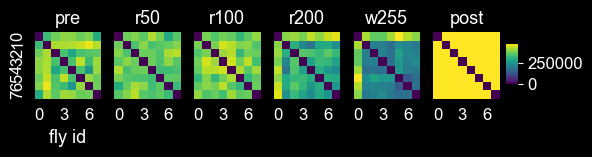

In [193]:
fig, axn = pl.subplots(1, len(epoch_names), sharex=True, sharey=True) #int(df_['epoch'].nunique()))
maxvs=[]
cbar_ax = fig.add_axes([.91, .45, .02, .1])
for i, ep in enumerate(epoch_names):
#     if ep=='post':
#         continue
    ax=axn[i]
    sns.heatmap(distmats[i], ax=ax, cmap='viridis', vmin=0, vmax=vmax,
                cbar=i == 0, cbar_ax=None if i else cbar_ax)
    if i==0:
        ax.set_xlabel('fly id')
    ax.set_title(ep)
    maxvs.append(distmat.max())
    ax.set_aspect(1)

figname = 'distmats_{}'.format(curr_exp)
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

## aggregate

In [195]:
dists=dict()
for curr_exp, df in df0.groupby('exp_abbr'):
    dfc = center_trajectories(df)

    dfc['epoch_exp_id'] = ['_'.join([a, b]) for a, b in zip(dfc['epoch'], dfc['flynum'])]
    ordered_labels = ['{}_{}'.format(ep_, id_) \
                      for ep_ in epoch_names for id_ in dfc['flynum'].unique()]
    id_lut = dict((v, k) for k, v in enumerate(ordered_labels)) #df0['epoch_exp_id'].unique()))
    dfc['exp_ix'] = [id_lut[i] for i in dfc['epoch_exp_id']]
    dfc['frame_ix'] = dfc.groupby(['exp_ix']).cumcount()

    distmats = [calculate_distmat_from_traj(dfc[dfc['epoch']==ep].copy()) \
                 for ep in epoch_names]

    dists[curr_exp] = distmats

In [288]:
epoch_names

['pre', 'r50', 'r100', 'r200', 'w255', 'post']

In [303]:
d_list=[]
for ki, (k, exp) in enumerate(dists.items()):
    #dif_vals = np.tril(v)
    off_diags = [v[np.tril_indices(v.shape[0], k=-1)] for v in exp]
    
    print(k, [i.shape for i in off_diags], np.array(off_diags).shape)
    d_ = pd.DataFrame(data=np.array(off_diags).T, columns=epoch_names, 
                 index=range(off_diags[0].shape[0]))
    d_['exp'] = k
    d_['n'] = off_diags[0].shape[0]
    d_list.append(d_)
    #d_list.append(pd.DataFrame(data=off_diags, columns=[k], index=ki))
distdf = pd.concat(d_list, axis=0)

821-CsChrimson [(6,), (6,), (6,), (6,), (6,), (6,)] (6, 6)
854-CsChrimson [(28,), (28,), (28,), (28,), (28,), (28,)] (6, 28)
871-CsChrimson [(15,), (15,), (15,), (15,), (15,), (15,)] (6, 15)
887-CsChrimson [(15,), (15,), (15,), (15,), (15,), (15,)] (6, 15)
911-CsChrimson [(6,), (6,), (6,), (6,), (6,), (6,)] (6, 6)
splitP1-CsChrimson [(28,), (28,), (28,), (28,), (28,), (28,)] (6, 28)


In [326]:
meltdf = pd.melt(distdf, value_vars=['pre', 'r50', 'r100', 'r200', 'w255', 'post'],
                id_vars = ['exp', 'n'], var_name='epoch', value_name='distance')
meltdf

,exp,n,epoch,distance
0,821-CsChrimson,6,pre,3.599728e+05
1,821-CsChrimson,6,pre,4.147605e+05
2,821-CsChrimson,6,pre,3.860746e+05
3,821-CsChrimson,6,pre,2.669353e+05
4,821-CsChrimson,6,pre,3.503256e+05
...,...,...,...,...
583,splitP1-CsChrimson,28,post,3.549715e+06
584,splitP1-CsChrimson,28,post,3.614346e+06
585,splitP1-CsChrimson,28,post,3.681840e+06
586,splitP1-CsChrimson,28,post,3.194968e+06


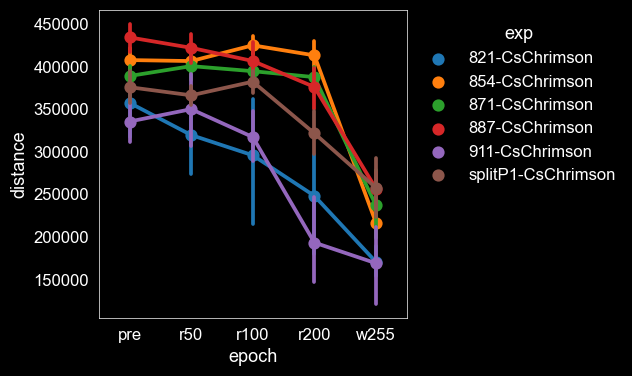

In [348]:
fig, ax = pl.subplots()
# plot the same data on both axes
sns.pointplot(data=meltdf[meltdf['epoch']!='post'], x='epoch', y='distance', 
              hue='exp', ax=ax)
sns.move_legend(ax, bbox_to_anchor=(1,1), loc='upper left', frameon=False)
ax.set_box_aspect(1)


figname = 'mean-dists'
pl.savefig(os.path.join(figdir, '{}.png'.format(figname)))

In [300]:
d_.mean()

pre     3.758440e+05
r50     3.662714e+05
r100    3.823357e+05
r200    3.215972e+05
w255    2.574523e+05
post    3.613035e+06
dtype: float64

In [287]:
dfc[dfc['exp_abbr']==k]['exp_id'].nunique()

8

In [228]:
mat =list(dists.values())[0][0]
# tri_ix = np.tril_indices(mat.shape[0]) #, k=mat.shape[0]) #, m=None)
mat = mat.round(2)

In [249]:
tri_ix = np.tril_indices(mat.shape[0], k=-1)
mat[tri_ix]

In [250]:
mat[tri_ix]

array([359972.8 , 414760.55, 386074.62, 266935.26, 350325.57, 366429.24])

In [248]:
mat

array([[     0.  , 359972.8 , 414760.55, 266935.26],
       [359972.8 ,      0.  , 386074.62, 350325.57],
       [414760.55, 386074.62,      0.  , 366429.24],
       [266935.26, 350325.57, 366429.24,      0.  ]])

In [207]:
print("{:.2f}, {:.2f}".format(dist200.min(), dist200.max()))
print("{:.2f}, {:.2f}".format(dist50.min(), dist50.max()))

# dist50.max()

0.00, 2871571.66
0.00, 2787937.74


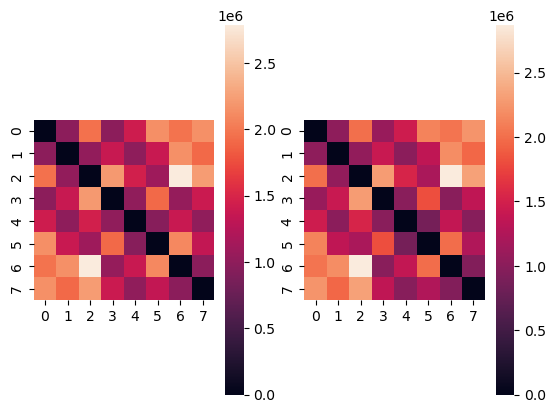

In [202]:
fig, axn = pl.subplots(1, 2)
ax=axn[0]
sns.heatmap(dist50, ax=ax)
ax=axn[1]
sns.heatmap(dist200, ax=ax)
for ax in axn:
    ax.set_aspect(1)

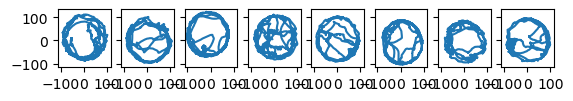

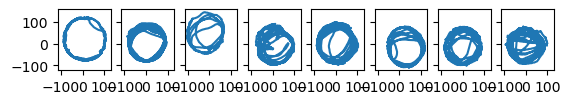

In [201]:

fig, axn = pl.subplots(1, int(df50['exp_id'].nunique()), sharex=True, sharey=True)
for i, (id_, d_) in enumerate(df50.groupby('exp_id')):
    ax=axn[i]
    ax.plot(d_['centered_pos_x'], d_['centered_pos_y'])
    ax.set_aspect(1)
    

fig, axn = pl.subplots(1, int(df200['exp_id'].nunique()), sharex=True, sharey=True)
for i, (id_, d_) in enumerate(df200.groupby('exp_id')):
    ax=axn[i]
    ax.plot(d_['centered_pos_x'], d_['centered_pos_y'])
    ax.set_aspect(1)